# 全世界株式(ACWI)の年次リターンと成長率

算術平均リターン（年率）: 6.99%
幾何平均リターン（年率）: 5.93%
近似幾何平均リターン（年率）: 5.84%
標準偏差（年率）: 15.13%


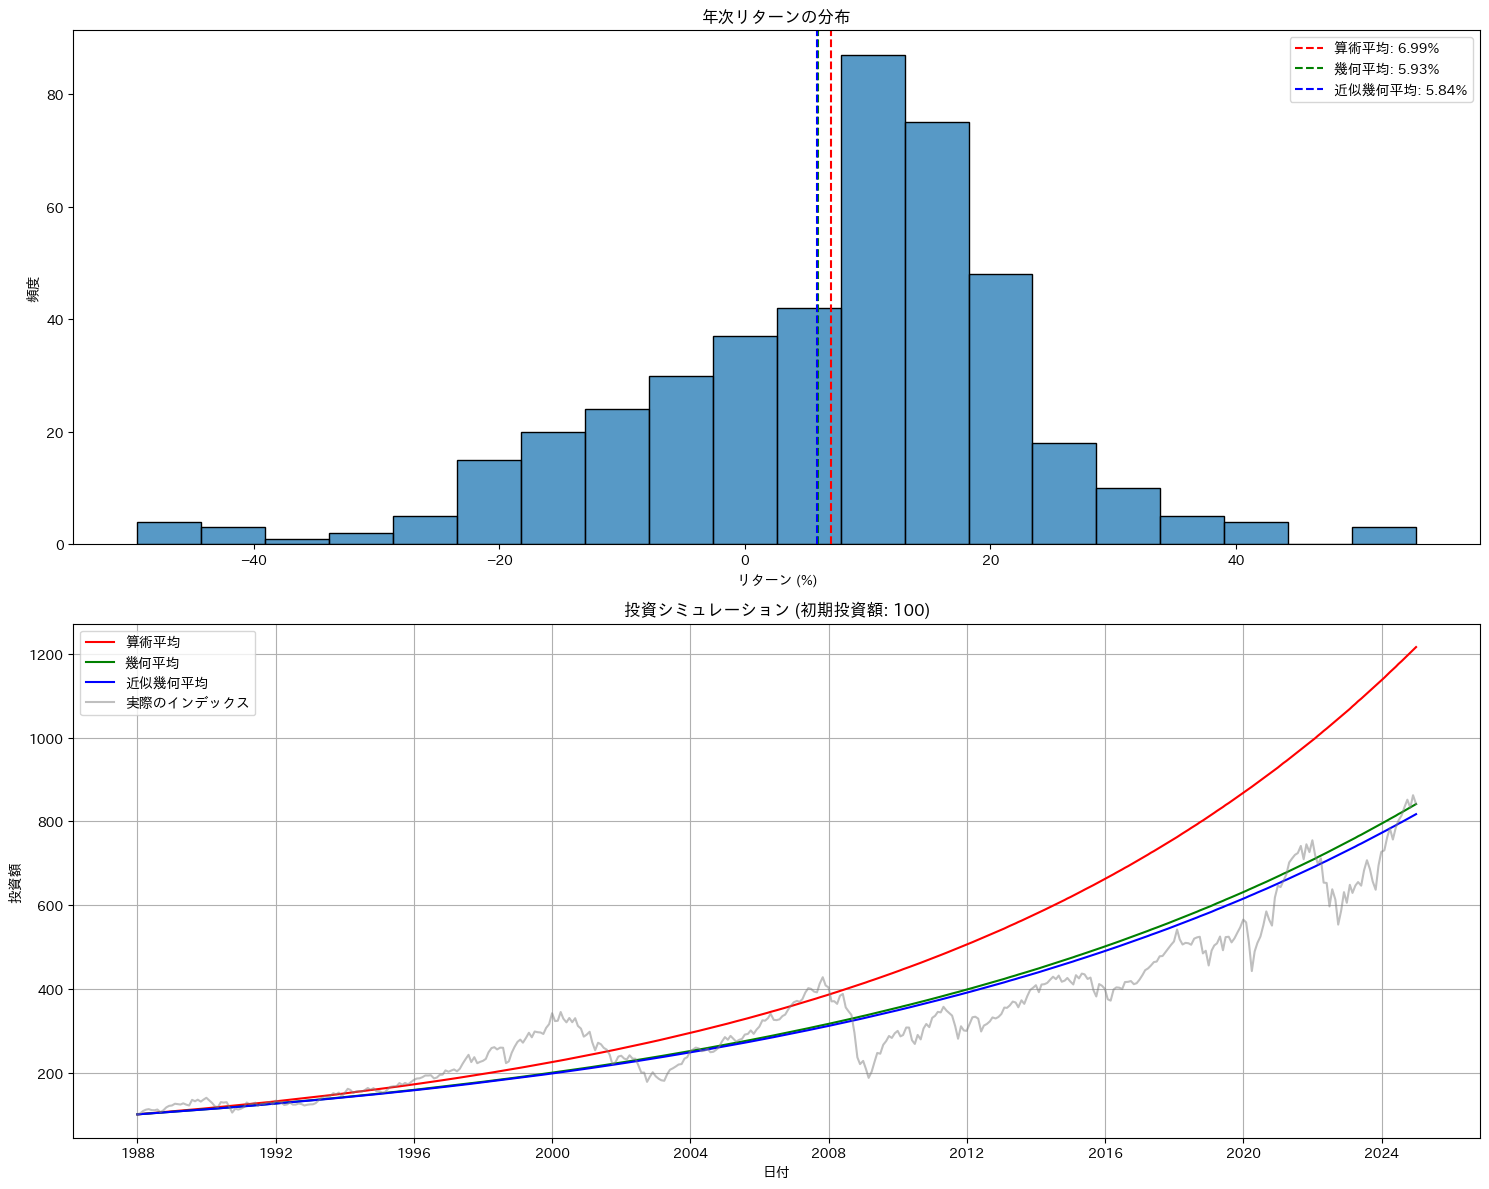

In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

def load_and_prepare_data(file_path, start_date):
    # データ読み込みと前処理
    df = pd.read_csv(file_path)
    df['Date'] = pd.to_datetime(df['Date'], format='%b %d, %Y')
    df = df[df['Date'] >= start_date]
    df.rename(columns={'ACWI Standard (Large+Mid Cap)': 'ACWI'}, inplace=True)
    
    # 月次リターンの計算
    df['Monthly_Return'] = df['ACWI'].pct_change()
    
    # 年次リターン計算（12ヶ月間の変化率）
    df['Annual_Return'] = (df['ACWI'].pct_change(periods=12)) * 100
    df['Year'] = df['Date'].dt.year
    
    return df

def calculate_returns_statistics(df):
    # 月次リターンの統計量計算
    monthly_returns = df['Monthly_Return'].dropna()
    
    # 月次の標準偏差を年率換算
    monthly_std = monthly_returns.std()
    annual_std = monthly_std * np.sqrt(12)
    
    # 年次リターンの算術平均
    annual_returns = df['Annual_Return'].dropna()
    arithmetic_mean = annual_returns.mean()
    
    # 幾何平均リターンの計算（月次データから年率換算）
    monthly_geometric_mean = (1 + monthly_returns).prod() ** (1/len(monthly_returns)) - 1
    geometric_mean = ((1 + monthly_geometric_mean) ** 12 - 1) * 100
    
    # 近似幾何平均の計算（月次データから年率換算）
    # 正しい計算式: μ_g ≈ μ_a - σ²/2 （μ_aは年率の算術平均、σ²は年率の分散）
    approx_geometric_mean = arithmetic_mean - ((annual_std) ** 2 * 100) / 2
    
    return arithmetic_mean, geometric_mean, approx_geometric_mean, annual_std * 100

def plot_returns_analysis(df, arithmetic_mean, geometric_mean, approx_geometric_mean):
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 12))
    
    # 年次リターンの分布プロット
    annual_returns = df['Annual_Return'].dropna()
    sns.histplot(data=annual_returns, bins=20, ax=ax1)
    ax1.axvline(arithmetic_mean, color='red', linestyle='--', 
                label=f'算術平均: {arithmetic_mean:.2f}%')
    ax1.axvline(geometric_mean, color='green', linestyle='--', 
                label=f'幾何平均: {geometric_mean:.2f}%')
    ax1.axvline(approx_geometric_mean, color='blue', linestyle='--', 
                label=f'近似幾何平均: {approx_geometric_mean:.2f}%')
    ax1.set_title('年次リターンの分布')
    ax1.set_xlabel('リターン (%)')
    ax1.set_ylabel('頻度')
    ax1.legend()
    
    # 投資シミュレーション（月次で複利計算）
    initial_investment = 100
    months = np.arange(0, len(df))
    
    # 各平均リターンを月次に変換
    monthly_arithmetic = (1 + arithmetic_mean/100) ** (1/12) - 1
    monthly_geometric = (1 + geometric_mean/100) ** (1/12) - 1
    monthly_approx_geometric = (1 + approx_geometric_mean/100) ** (1/12) - 1
    
    for return_value, label, color in [
        (monthly_arithmetic, '算術平均', 'red'),
        (monthly_geometric, '幾何平均', 'green'),
        (monthly_approx_geometric, '近似幾何平均', 'blue')
    ]:
        investment = initial_investment * (1 + return_value) ** months
        ax2.plot(df['Date'], investment, label=f'{label}', color=color)
    
    # 実際の指数の推移も追加
    normalized_index = df['ACWI'] / df['ACWI'].iloc[0] * initial_investment
    ax2.plot(df['Date'], normalized_index, label='実際のインデックス', color='gray', alpha=0.5)
    
    ax2.set_title('投資シミュレーション (初期投資額: 100)')
    ax2.set_xlabel('日付')
    ax2.set_ylabel('投資額')
    ax2.legend()
    ax2.grid(True)
    
    plt.tight_layout()
    return fig

def main():
    # データ準備
    df = load_and_prepare_data('data/ACWI.csv', '1987-12-31')
        
    # 統計量計算
    arithmetic_mean, geometric_mean, approx_geometric_mean, annual_std = calculate_returns_statistics(df)
    
    # 結果表示
    print(f"算術平均リターン（年率）: {arithmetic_mean:.2f}%")
    print(f"幾何平均リターン（年率）: {geometric_mean:.2f}%")
    print(f"近似幾何平均リターン（年率）: {approx_geometric_mean:.2f}%")
    print(f"標準偏差（年率）: {annual_std:.2f}%")
    
    # プロット
    fig = plot_returns_analysis(df, arithmetic_mean, geometric_mean, approx_geometric_mean)
    plt.show()

if __name__ == "__main__":
    main()

# 為替の時間推移

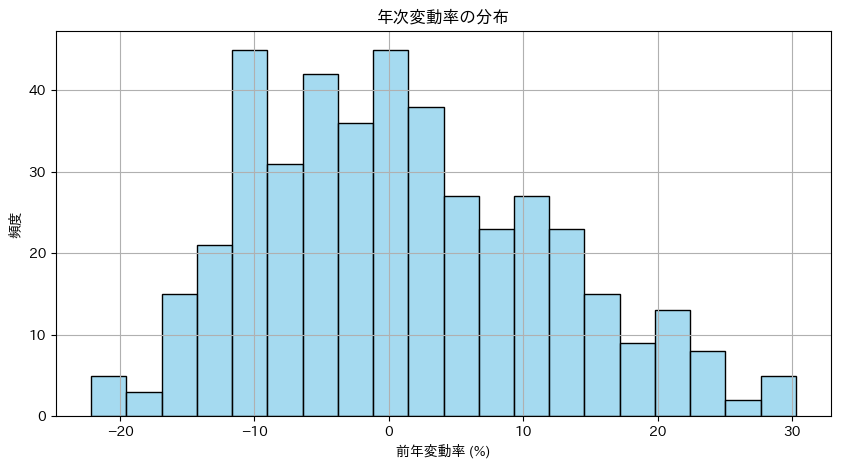

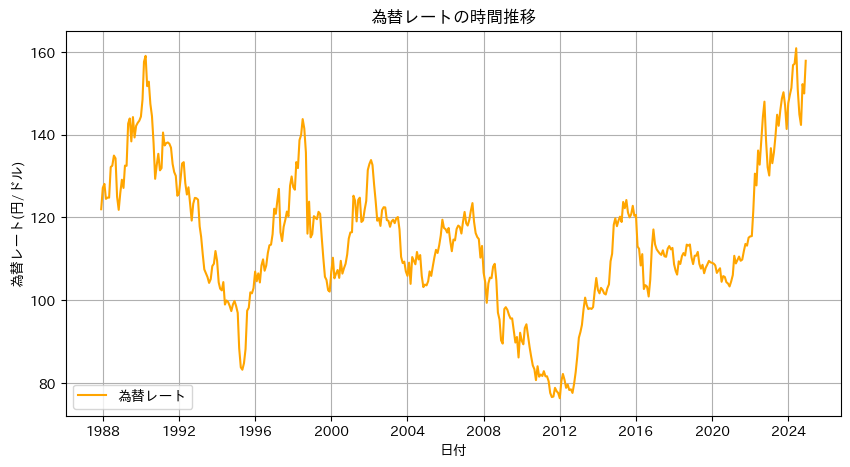

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import japanize_matplotlib  # 日本語対応
import seaborn as sns


# CSVファイルの読み込み - 必要に応じてencodingを指定
df_rate = pd.read_csv('data/fm08_m_1.csv', header=None)

# 最初の列を日付として解析
df_rate.iloc[:, 0] = pd.to_datetime(df_rate.iloc[:, 0], format='%Y/%m', errors='coerce')

# 1987年12月以降の日付をTimestampに変換
cutoff_date = pd.to_datetime('1987-12')

# 1987年12月以降のデータでフィルタリング
df_rate = df_rate[df_rate.iloc[:, 0] >= cutoff_date]

    # 月次リターンの計算
df_rate['Monthly_Return'] = df_rate.iloc[:, 1].pct_change()

# 年次リターン計算（12ヶ月間の変化率）
df_rate['Annual_Return'] = (df_rate.iloc[:, 1].pct_change(periods=12)) * 100

# 年次リターンをsns.histplotでプロット
plt.figure(figsize=(10, 5))
sns.histplot(data=df_rate['Annual_Return'].dropna(), bins=20, color='skyblue')
plt.title('年次変動率の分布')
plt.xlabel('前年変動率 (%)')
plt.ylabel('頻度')
plt.grid(True)
plt.show()

# プロット
plt.figure(figsize=(10, 5))
plt.plot(df_rate.iloc[:, 0], df_rate.iloc[:, 1], label='為替レート', color='orange')
plt.title('為替レートの時間推移')
plt.xlabel('日付')
plt.ylabel('為替レート(円/ドル)')
plt.grid(True)
plt.legend()
plt.show()





# 為替を考慮した全世界株式(ACWI)の年次リターンと成長率

算術平均リターン（年率）: 8.10%
幾何平均リターン（年率）: 6.67%
近似幾何平均リターン（年率）: 6.62%
標準偏差（年率）: 17.17%


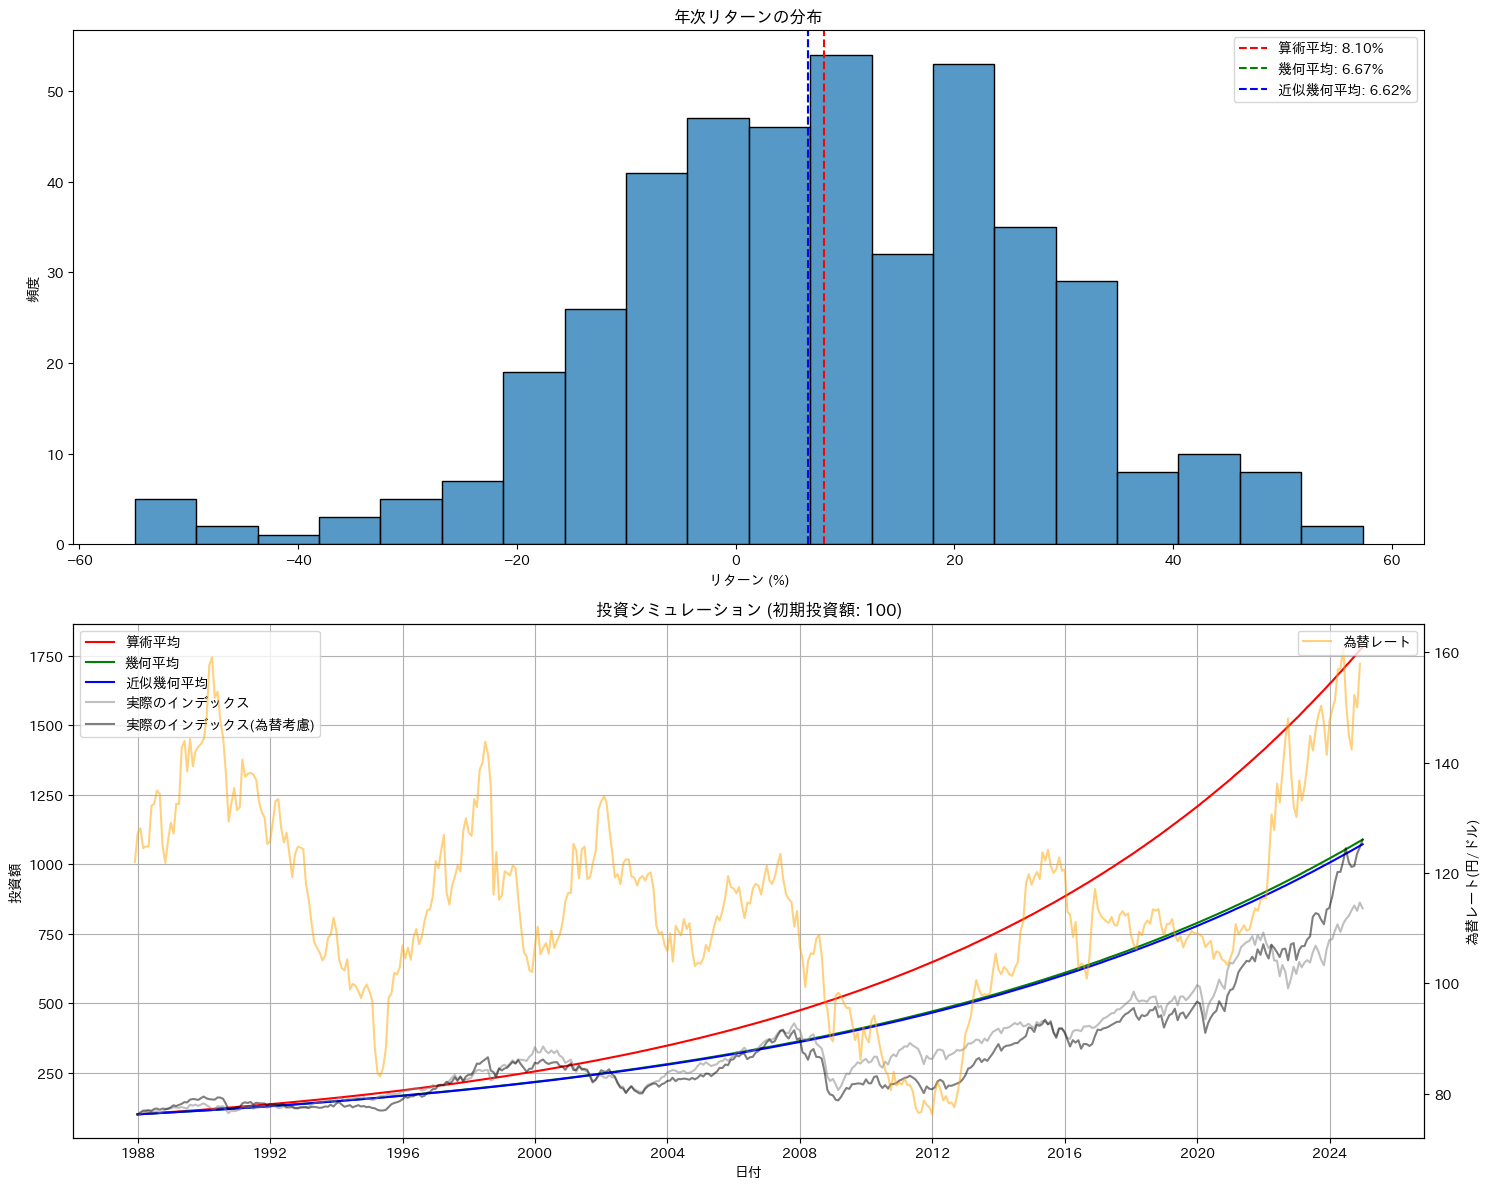

In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def load_and_prepare_data(df_index, df_rate, start_date):
    # index読み込みと前処理
    df = pd.read_csv(df_index)
    df['Date'] = pd.to_datetime(df['Date'], format='%b %d, %Y')
    df = df[df['Date'] >= start_date]
    df.rename(columns={'ACWI Standard (Large+Mid Cap)': 'ACWI'}, inplace=True)

    # 為替の読み込みと前処理 
    df_rate = pd.read_csv(df_rate, header=None)
    # 最初の列を日付として解析
    df_rate.iloc[:, 0] = pd.to_datetime(df_rate.iloc[:, 0], format='%Y/%m', errors='coerce')
    # 1987年12月以降の日付をTimestampに変換
    cutoff_date = pd.to_datetime(start_date)
    # 1987年12月以降のデータでフィルタリング
    df_rate = df_rate[df_rate.iloc[:, 0] >= cutoff_date]

    # 為替を考慮したACWI_yen列の追加
    df['ACWI_yen'] = df['ACWI'] * df_rate.iloc[:, 1].values
    
    # 月次リターンの計算
    df['Monthly_Return'] = df['ACWI_yen'].pct_change()
    
    # 年次リターン計算（12ヶ月間の変化率）
    df['Annual_Return'] = (df['ACWI_yen'].pct_change(periods=12)) * 100
    df['Year'] = df['Date'].dt.year
    
    return df

def calculate_returns_statistics(df):
    # 月次リターンの統計量計算
    monthly_returns = df['Monthly_Return'].dropna()
    
    # 月次の標準偏差を年率換算
    monthly_std = monthly_returns.std()
    annual_std = monthly_std * np.sqrt(12)
    
    # 年次リターンの算術平均
    annual_returns = df['Annual_Return'].dropna()
    arithmetic_mean = annual_returns.mean()
    
    # 幾何平均リターンの計算（月次データから年率換算）
    monthly_geometric_mean = (1 + monthly_returns).prod() ** (1/len(monthly_returns)) - 1
    geometric_mean = ((1 + monthly_geometric_mean) ** 12 - 1) * 100
    
    # 近似幾何平均の計算（月次データから年率換算）
    # 正しい計算式: μ_g ≈ μ_a - σ²/2 （μ_aは年率の算術平均、σ²は年率の分散）
    approx_geometric_mean = arithmetic_mean - ((annual_std) ** 2 * 100) / 2
    
    return arithmetic_mean, geometric_mean, approx_geometric_mean, annual_std * 100

def plot_returns_analysis(df, df_rate, arithmetic_mean, geometric_mean, approx_geometric_mean):
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 12))
    
    # 年次リターンの分布プロット
    annual_returns = df['Annual_Return'].dropna()
    sns.histplot(data=annual_returns, bins=20, ax=ax1)
    ax1.axvline(arithmetic_mean, color='red', linestyle='--', 
                label=f'算術平均: {arithmetic_mean:.2f}%')
    ax1.axvline(geometric_mean, color='green', linestyle='--', 
                label=f'幾何平均: {geometric_mean:.2f}%')
    ax1.axvline(approx_geometric_mean, color='blue', linestyle='--', 
                label=f'近似幾何平均: {approx_geometric_mean:.2f}%')
    ax1.set_title('年次リターンの分布')
    ax1.set_xlabel('リターン (%)')
    ax1.set_ylabel('頻度')
    ax1.legend()
    
    # 投資シミュレーション（月次で複利計算）
    initial_investment = 100
    months = np.arange(0, len(df))
    
    # 各平均リターンを月次に変換
    monthly_arithmetic = (1 + arithmetic_mean/100) ** (1/12) - 1
    monthly_geometric = (1 + geometric_mean/100) ** (1/12) - 1
    monthly_approx_geometric = (1 + approx_geometric_mean/100) ** (1/12) - 1
    
    for return_value, label, color in [
        (monthly_arithmetic, '算術平均', 'red'),
        (monthly_geometric, '幾何平均', 'green'),
        (monthly_approx_geometric, '近似幾何平均', 'blue')
    ]:
        investment = initial_investment * (1 + return_value) ** months
        ax2.plot(df['Date'], investment, label=f'{label}', color=color)
    
    # 実際の指数の推移も追加
    normalized_index = df['ACWI'] / df['ACWI'].iloc[0] * initial_investment
    normalized_index_yen = df['ACWI_yen'] / df['ACWI_yen'].iloc[0] * initial_investment
    ax2.plot(df['Date'], normalized_index, label='実際のインデックス', color='gray', alpha=0.5)
    ax2.plot(df['Date'], normalized_index_yen, label='実際のインデックス(為替考慮)', color='black', alpha=0.5)


    # 為替を右軸に追加
    ax2_rate = ax2.twinx()
    ax2_rate.plot(df_rate.iloc[:, 0], df_rate.iloc[:, 1], label='為替レート', color='orange', alpha=0.5)
    
    ax2.set_title('投資シミュレーション (初期投資額: 100)')
    ax2.set_xlabel('日付')
    ax2.set_ylabel('投資額')
    ax2.legend()
    ax2_rate.set_ylabel('為替レート(円/ドル)')
    # loc='upper right' で凡例を右上に表示
    ax2_rate.legend(loc='upper right')
    ax2.grid(True)
    
    plt.tight_layout()
    return fig

def main():
    # データ準備
    df = load_and_prepare_data(df_index='data/ACWI.csv', df_rate='data/fm08_m_1.csv', start_date='1987-12')
    
    # 統計量計算
    arithmetic_mean, geometric_mean, approx_geometric_mean, annual_std = calculate_returns_statistics(df)
    
    # 結果表示
    print(f"算術平均リターン（年率）: {arithmetic_mean:.2f}%")
    print(f"幾何平均リターン（年率）: {geometric_mean:.2f}%")
    print(f"近似幾何平均リターン（年率）: {approx_geometric_mean:.2f}%")
    print(f"標準偏差（年率）: {annual_std:.2f}%")
    
    # プロット
    fig = plot_returns_analysis(df, df_rate, arithmetic_mean, geometric_mean, approx_geometric_mean)
    plt.show()

if __name__ == "__main__":
    main()

# ｅＭＡＸＩＳ Ｓｌｉｍ 全世界株式（オール・カントリー） 毎月積立 vs 一括投資の評価額比較（2024年）

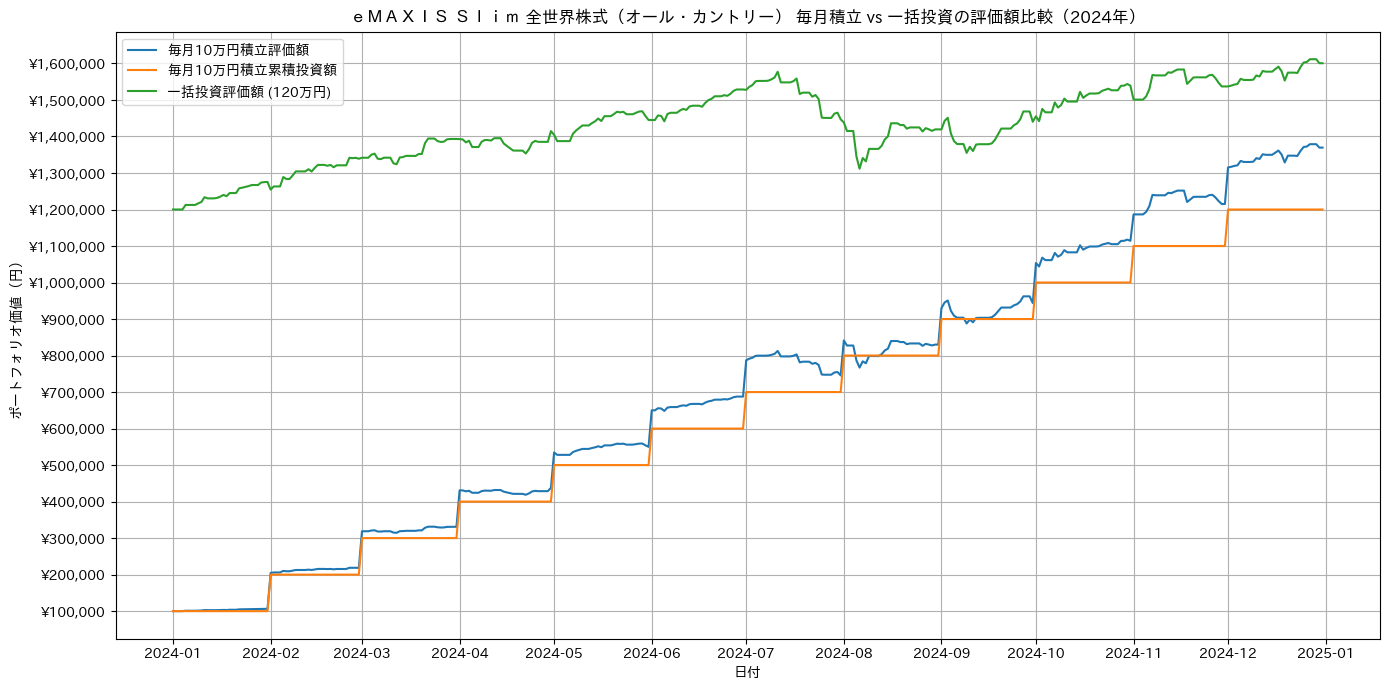

毎月積立:
  評価額: ¥1,369,514
  損益: ¥169,514
  損益率: 14.13%
  積立総額: ¥1,200,000

一括投資:
  評価額: ¥1,600,655
  損益: ¥400,655
  損益率: 33.39%
  累積投資額: ¥1,200,000


In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import japanize_matplotlib  # 日本語対応

# CSVファイルのパス
csv_file = 'data/m00355920.csv'

# CSVを読み込み、日付をパース
df = pd.read_csv(csv_file, encoding='utf-8-sig')
df['年月日'] = pd.to_datetime(df['年月日'])
df = df.sort_values('年月日').reset_index(drop=True)

# 2024年の全日付カレンダーを作成
calendar_2024 = pd.date_range(start='2024-01-01', end='2024-12-31', freq='D')
df_calendar = pd.DataFrame({'年月日': calendar_2024})

# CSVデータとカレンダーをマージ
df = df.merge(df_calendar, on='年月日', how='right')

# 基準価額を数値型に変換（カンマが含まれている場合に備えて）
df['基準価額（円）'] = pd.to_numeric(df['基準価額（円）'], errors='coerce')

# 欠損値を埋める（直前の値で保管。ただし1/1~1/3は1/4の値で保管）
df['基準価額（円）'] = df['基準価額（円）'].fillna(method='ffill')  # 前日の値で保管
jan_4_value = df.loc[df['年月日'] == '2024-01-04', '基準価額（円）'].iloc[0]
df.loc[df['年月日'] < '2024-01-04', '基準価額（円）'] = df.loc[
    df['年月日'] < '2024-01-04', '基準価額（円）'
].fillna(jan_4_value)

# 最終的なデータフレームを2024年に限定
df_2024 = df[df['年月日'].dt.year == 2024].reset_index(drop=True)

# =======================
# 毎月積立の評価額を計算
# =======================
investment_per_month = 100000  # 毎月の購入額
units_owned = 0  # 現在の保有ユニット数
total_portfolio_value = []  # 各日付時点での累積ポートフォリオ評価額
total_investment = []  # 合計投資額

total_investment.append(0)  # 最初の投資額は0円

# 各月の1日に購入し、その評価額を累積計算
for index, row in df_2024.iterrows():
    date = row['年月日']
    nav = row['基準価額（円）']
    
    # 月初の1日に購入するユニット数を計算
    if date.day == 1:  # 1日のみ購入
        units_to_buy = investment_per_month / nav
        units_owned += units_to_buy  # 購入した分だけ保有ユニット数を増やす
        total_investment.append(total_investment[-1] + investment_per_month)  # 累積投資額を記録

    
    # 現在の基準価格で評価額を計算
    current_value = units_owned * nav
    
    # 現在の累積評価額を記録
    total_portfolio_value.append(current_value)

    if date.day != 1:
      total_investment.append(total_investment[-1])

# データフレームに累積評価額を追加
df_2024['毎月積立評価額'] = total_portfolio_value


# =======================
# 一括投資の評価額を計算
# =======================
lump_sum_investment = 1200000  # 一括投資額
lump_sum_units = lump_sum_investment / df_2024.loc[0, '基準価額（円）']  # 一括購入時の基準価額で購入単位を計算
df_2024['一括投資評価額'] = df_2024['基準価額（円）'] * lump_sum_units

import matplotlib.ticker as ticker

# =======================
# グラフの描画
# =======================
plt.figure(figsize=(14, 7))

# 毎月積立の評価額をプロット
plt.plot(
    df_2024['年月日'],
    df_2024['毎月積立評価額'],
    label='毎月10万円積立評価額',
)

plt.plot(
    df_2024['年月日'],
    total_investment[1:],
    label='毎月10万円積立累積投資額'
)

# 一括投資の評価額をプロット
plt.plot(
    df_2024['年月日'],
    df_2024['一括投資評価額'],
    label='一括投資評価額 (120万円)',
)

# グラフの設定
plt.xlabel('日付')
plt.ylabel('ポートフォリオ価値（円）')
plt.title('ｅＭＡＸＩＳ Ｓｌｉｍ 全世界株式（オール・カントリー） 毎月積立 vs 一括投資の評価額比較（2024年）')

# 縦軸を円単位で表示
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'¥{x:,.0f}'))

# 縦軸を10万円ごとにメモリ表示
plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(100000))



# 横軸を毎月ごとにメモリ表示
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())


# グリッドとレイアウト
plt.legend()
plt.grid(True)
plt.tight_layout()

# グラフの表示
plt.show()



# 毎月積立
print('毎月積立:')
print(f'  評価額: ¥{df_2024["毎月積立評価額"].iloc[-1]:,.0f}')
print(f'  損益: ¥{df_2024["毎月積立評価額"].iloc[-1] - lump_sum_investment:,.0f}')
# .2f で小数点以下2桁までパーセント表示
print(f'  損益率: {((df_2024["毎月積立評価額"].iloc[-1] - lump_sum_investment) / lump_sum_investment) * 100:.2f}%')
print(f'  積立総額: ¥{investment_per_month * len(df_2024["年月日"].dt.month.unique()):,}')
print()

# 一括投資
print('一括投資:')
print(f'  評価額: ¥{df_2024["一括投資評価額"].iloc[-1]:,.0f}')
print(f'  損益: ¥{df_2024["一括投資評価額"].iloc[-1] - lump_sum_investment:,.0f}')
# .2f で小数点以下2桁までパーセント表示
print(f'  損益率: {((df_2024["一括投資評価額"].iloc[-1] - lump_sum_investment) / lump_sum_investment) * 100:.2f}%')
print(f'  累積投資額: ¥{lump_sum_investment:,}')





